<a href="https://colab.research.google.com/github/lastfirefly/Cryptocurrency/blob/main/Crypto_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 5 – Criptomoedas

## ***Sobre o Projeto***

### O QUE É PARA FAZER?

Realizar uma análise exploratória histórica dos valores de
criptomoedas.

As fontes de dados que serão utilizadas no projeto estão
disponíveis no [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory).

## ***Desenvolvimento***

O projeto consistirá em algumas etapas:

- Importação de dados;
- Limpeza do dataset;
- Organização;
- Análise exploratória;
- Exportação para o Banco de Dados.

### Importação dos dados

In [ ]:
#Importando bibliotecas que serão usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
#Lendo os csv pelo link do site

# Referente à moeda Binance
url1 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_BinanceCoin.csv'
bnb = pd.read_csv(url1,sep=',')

# Referente à moeda Bitcoin
url2 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_Bitcoin.csv'
btc = pd.read_csv(url2,sep=',')

# Referente à moeda Cardano
url3 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_Cardano.csv'
ada = pd.read_csv(url3,sep=',')

# Referente à moeda Dogecoin
url4 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_Dogecoin.csv'
doge = pd.read_csv(url4,sep=',')

# Referente à moeda Ethereum
url5 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_Ethereum.csv'
eth = pd.read_csv(url5,sep=',')

# Referente à moeda Polkadot
url6 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_Polkadot.csv'
dot = pd.read_csv(url6,sep=',')

# Referente à moeda Tether
url7 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_Tether.csv'
usdt = pd.read_csv(url7,sep=',')

# Referente à moeda USDCoin
url8 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_USDCoin.csv'
usdc = pd.read_csv(url8,sep=',')

# Referente à moeda USDCoin
url9 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_Uniswap.csv'
uni = pd.read_csv(url9,sep=',')

# Referente à moeda USDCoin
url10 = 'https://raw.githubusercontent.com/lastfirefly/Cryptocurrency/main/data/source_data/coin_XRP.csv'
xrp = pd.read_csv(url10,sep=',')

Aqui foi feita a importação de todos os arquivos das moedas para pudessemos trabalhar com elas

As moedas e suas variáveis são, respcetivamente:

| Nome da Cripto | Variável/Sigla |
|----------------|----------------|
| Binance | BNB|
|Bitcoin| BTC|
|Cardano|ADA|
|Dogecoin|DOGE|
|Ethereum| ETH|
|Polkadot|DOT|
|Tether| USDT|
| USDCoin|USDC|
|Uniswap| UNI|
|XRP | XRP|

###Limpeza dos Datasets

In [ ]:
#Definindo uma lista para percorrer todos os dataframes
dflist = [bnb, btc, ada, doge, eth, dot, usdt, usdc, uni, xrp]

In [ ]:
#visualizando formato das tabelas

uni.head(3)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Uniswap,UNI,2020-09-18 23:59:59,8.438537,3.261757,3.488153,6.897257,6.061110e+09,6.681116e+08
1,2,Uniswap,UNI,2020-09-19 23:59:59,7.443275,5.321795,6.945577,5.724464,2.447471e+09,5.545076e+08
2,3,Uniswap,UNI,2020-09-20 23:59:59,6.050326,4.720210,5.720515,5.244195,1.554144e+09,5.079857e+08


In [ ]:
#visualizando formato das tabelas

bnb.head(3)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0


In [ ]:
#Visualizando número de linhas e colunas dos 10 dataframes
print("------------- Moedas -------------")
print("BNB: ",bnb.shape,"| BTC:", btc.shape,"\nADA: ", ada.shape,"| DOGE:", doge.shape, "\nETH: ", eth.shape,"| DOT: ", dot.shape, "\nUSDT:", usdt.shape, "| USDC:", usdc.shape, "\nUNI: ", uni.shape, " | XRP: ", xrp.shape)

------------- Moedas -------------
BNB:  (1442, 10) | BTC: (2991, 10) 
ADA:  (1374, 10) | DOGE: (2760, 10) 
ETH:  (2160, 10) | DOT:  (320, 10) 
USDT: (2318, 10) | USDC: (1002, 10) 
UNI:  (292, 10)  | XRP:  (2893, 10)


In [ ]:
#Crindo loop para iterar por dataframes e verificar informações

for df in dflist:
  print(df['Name'].head(1), df.info(), '\n\n', '*'*30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        1442 non-null   int64  
 1   Name       1442 non-null   object 
 2   Symbol     1442 non-null   object 
 3   Date       1442 non-null   object 
 4   High       1442 non-null   float64
 5   Low        1442 non-null   float64
 6   Open       1442 non-null   float64
 7   Close      1442 non-null   float64
 8   Volume     1442 non-null   float64
 9   Marketcap  1442 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 112.8+ KB
0    Binance Coin
Name: Name, dtype: object None 

 ******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 

In [ ]:
#Visualizando a descrição da coluna "Marketcap"
bnb['Marketcap'].describe()

count    1.442000e+03
mean     7.835575e+09
std      1.780041e+10
min      9.986680e+06
25%      1.157863e+09
50%      2.451099e+09
75%      4.061743e+09
max      1.036722e+11
Name: Marketcap, dtype: float64

In [ ]:
#Crindo loop para iterar por dataframes e verificar a descrição da coluna Marketcap
for df in dflist:
  print('\n', df['Name'].head(1), df['Marketcap'].describe(), '\n\n', '*'*30)


 0    Binance Coin
Name: Name, dtype: object count    1.442000e+03
mean     7.835575e+09
std      1.780041e+10
min      9.986680e+06
25%      1.157863e+09
50%      2.451099e+09
75%      4.061743e+09
max      1.036722e+11
Name: Marketcap, dtype: float64 

 ******************************

 0    Bitcoin
Name: Name, dtype: object count    2.991000e+03
mean     1.208761e+11
std      2.109438e+11
min      7.784112e+08
25%      6.305579e+09
50%      3.741503e+10
75%      1.499957e+11
max      1.186364e+12
Name: Marketcap, dtype: float64 

 ******************************

 0    Cardano
Name: Name, dtype: object count    1.374000e+03
mean     7.603454e+09
std      1.303878e+10
min      4.806646e+08
25%      1.191263e+09
50%      2.270889e+09
75%      5.174547e+09
max      7.377224e+10
Name: Marketcap, dtype: float64 

 ******************************

 0    Dogecoin
Name: Name, dtype: object count    2.760000e+03
mean     1.760533e+09
std      8.115186e+09
min      1.509085e+06
25%      2.33789

In [ ]:
#Crindo loop para iterar por dataframes e verificar se possui alguma coluna com valor vazio

for df in dflist:
  print(df['Name'].head(1), df.isnull().any(), '\n', '*'*30)

0    Binance Coin
Name: Name, dtype: object SNo          False
Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool 
 ******************************
0    Bitcoin
Name: Name, dtype: object SNo          False
Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool 
 ******************************
0    Cardano
Name: Name, dtype: object SNo          False
Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool 
 ******************************
0    Dogecoin
Name: Name, dtype: object SNo          False
Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False


### Organização

In [ ]:
df_all = pd.concat(dflist)

In [ ]:
# Convertendo a coluna 'Date' para datetime
df_all['Date'] = pd.to_datetime(df_all['Date'])

# Criando uma coluna 'Year' e 'Weekday'
df_all['Year'] = df_all['Date'].dt.year
df_all['Weekday'] = df_all['Date'].dt.weekday


###Análise Exploratória

***Faremos aqui uma análise exploratória baseado nas perguntas apenas para visualizar melhor como os dados se comportam. Todo o storytelling, junto com as próprias visualizações, estão no arquivo de datavis Power BI***

#### Pergunta 1

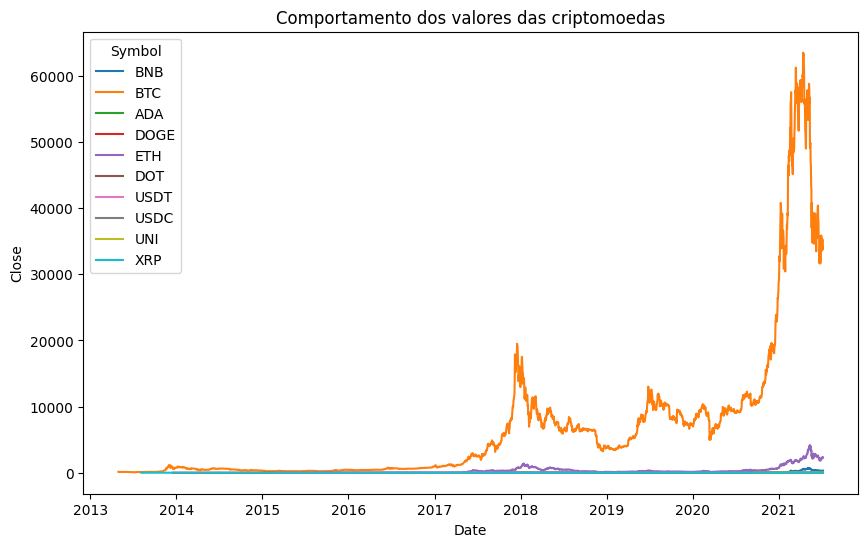

In [ ]:
# Pergunta 1: Como se comportaram os valores para todas as criptomoedas?
plt.figure(figsize=(10,6))
sns.lineplot(data=df_all, x='Date', y='Close', hue='Symbol')
plt.title('Comportamento dos valores das criptomoedas')
plt.show()

Apenas uma explicação do porquê é importante ser feita a análise:

Apesar de parecer bem claro que a Bitcoin está à frente de todas as outras, isso pode ser justificado se forem analisada as datas de criação e lançamento de cada uma delas. É justificável que a Bitcoin por ter sido pioneira, seja a cryptomoeda de maior relevância por algum tempo, dado que não existiam concorrentes no mercado.

|Nome|Data de criação|
|----|---------------|
|Binance Coin (BNB): |Foi lançada em julho de 2017|
|Bitcoin: |Foi criado por Satoshi Nakamoto e a rede Bitcoin entrou em operação em 3 de janeiro de 2009|
|Cardano:| Foi lançado em setembro de 2013|
|Dogecoin:|Foi criado em dezembro de 2013|
|Ethereum:| Foi concebido em 2013 e a rede entrou em operação em 30 de julho de 2015|
|Polkadot: |Foi lançado em 18 de dezembro de 2021|
|Tether:| Foi lançado em 2014|
|USD Coin (USDC):| Foi lançado em setembro de 2018|
|Uniswap:| Foi criado em 2 de novembro de 2018|
|XRP:| Foi lançado em 2012|


#### Pergunta 2

In [113]:
# Pergunta 2: Quais os valores médios para todas as criptomoedas?

open = df_all.groupby('Symbol')['Open'].mean()
high = df_all.groupby('Symbol')['High'].mean()
low = df_all.groupby('Symbol')['Low'].mean()
close = df_all.groupby('Symbol')['Close'].mean()

daily_average = (open + high + low + close) / 4

print(daily_average)


       SNo          Name Symbol                Date      High       Low  \
0        1  Binance Coin    BNB 2017-07-26 23:59:59  0.109013  0.099266   
1        2  Binance Coin    BNB 2017-07-27 23:59:59  0.108479  0.100888   
2        3  Binance Coin    BNB 2017-07-28 23:59:59  0.109019  0.101473   
3        4  Binance Coin    BNB 2017-07-29 23:59:59  0.111264  0.101108   
4        5  Binance Coin    BNB 2017-07-30 23:59:59  0.108138  0.103162   
...    ...           ...    ...                 ...       ...       ...   
2888  2889           XRP    XRP 2021-07-02 23:59:59  0.667287  0.634726   
2889  2890           XRP    XRP 2021-07-03 23:59:59  0.683677  0.644653   
2890  2891           XRP    XRP 2021-07-04 23:59:59  0.707783  0.665802   
2891  2892           XRP    XRP 2021-07-05 23:59:59  0.695653  0.648492   
2892  2893           XRP    XRP 2021-07-06 23:59:59  0.679923  0.652676   

          Open     Close        Volume     Marketcap  Year  Weekday  \
0     0.105893  0.105138  2.

#### Pergunta 3

In [94]:
# Pergunta 3: Em quais anos houve maiores quedas e valorizações?
yearly_returns = df_all.groupby(['Symbol', 'Year'])['Close'].apply(lambda x: x.pct_change().sum())
print('Retornos anuais para todas as criptomoedas:\n', yearly_returns)

Retornos anuais para todas as criptomoedas:
 Symbol  Year
ADA     2017    4.857584
        2018   -1.984761
        2019    0.128657
        2020    2.321173
        2021    2.711665
BNB     2017    6.037029
        2018    0.621338
        2019    1.153027
        2020    1.456259
        2021    2.999192
BTC     2013    2.216917
        2014   -0.598561
        2015    0.557064
        2016    0.913841
        2017    3.107621
        2018   -0.960891
        2019    0.855393
        2020    1.676045
        2021    0.372462
DOGE    2013    2.339034
        2014    0.830668
        2015    0.123133
        2016    0.839813
        2017    5.175427
        2018   -0.397495
        2019    0.043545
        2020    1.331196
        2021    7.691497
DOT     2020    1.582850
        2021    1.399862
ETH     2015    0.816464
        2016    2.985074
        2017    5.480683
        2018   -1.175690
        2019    0.225718
        2020    2.212600
        2021    1.578580
UNI     2020    0

#### Pergunta 4

In [124]:
# Pergunta 4: Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

# Calcular a média diária
df_all['Daily_Average'] = (df_all['Open'] + df_all['High'] + df_all['Low'] + df_all['Close']) / 4
# Calcular a mudança percentual média para cada dia da semana
weekday_trends = df_all.groupby(['Symbol', 'Weekday'])['Daily_Average'].apply(lambda x: x.pct_change().mean()).unstack()

print(weekday_trends)

Weekday         0         1         2         3         4         5         6
Symbol                                                                       
ADA      0.050190  0.049251  0.051906  0.051476  0.050341  0.050440  0.053910
BNB      0.083521  0.077453  0.073964  0.075032  0.078984  0.076103  0.078209
BTC      0.019126  0.019192  0.019580  0.019558  0.020015  0.020352  0.020268
DOGE     0.048012  0.054446  0.051121  0.041565  0.048263  0.044491  0.044944
DOT      0.053066  0.049212  0.040216  0.037140  0.060342  0.058742  0.058271
ETH      0.041763  0.039865  0.039842  0.039605  0.038677  0.037587  0.041849
UNI      0.057559  0.063849  0.058706  0.054286  0.049557  0.051618  0.058913
USDC    -0.000253 -0.000017 -0.000051 -0.000071 -0.000057 -0.000068 -0.000079
USDT     0.002139  0.002005  0.000046 -0.000467  0.000033  0.000025  0.000027
XRP      0.039384  0.035802  0.039780  0.038207  0.036004  0.034894  0.041220


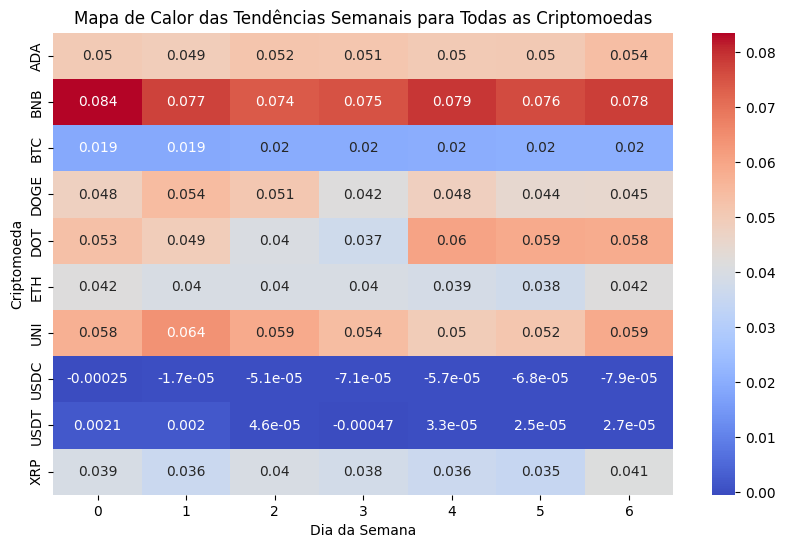

In [122]:
# Criar um mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(weekday_trends, cmap='coolwarm', annot=True)
plt.title('Mapa de Calor das Tendências Semanais para Todas as Criptomoedas')
plt.xlabel('Dia da Semana')
plt.ylabel('Criptomoeda')
plt.show()

#### Perguntas 5 e 6

In [126]:
# Pergunta 5 e 6: Qual moeda se mostra mais/menos interessante em relação à valorização pela análise da série histórica?

total_returns = df_all.groupby('Symbol')['Marketcap'].apply(lambda x: (x.iloc[-1] / x.iloc[0]) - 1)
print('Retornos totais para todas as criptomoedas:\n', total_returns)
print('Moeda mais interessante: ', total_returns.idxmax())
print('Moeda menos interessante: ', total_returns.idxmin())

Retornos totais para todas as criptomoedas:
 Symbol
ADA     7.103314e+01
BNB     4.682555e+03
BTC     3.992442e+02
DOGE    2.024472e+04
DOT              inf
ETH     5.957389e+03
UNI     1.868983e+01
USDC             inf
USDT    2.054743e+05
XRP     6.991693e+02
Name: Marketcap, dtype: float64
Moeda mais interessante:  DOT
Moeda menos interessante:  UNI


<ipython-input-126-2843d79598ef>:2: RuntimeWarning: divide by zero encountered in scalar divide
  total_returns = df_all.groupby('Symbol')['Marketcap'].apply(lambda x: (x.iloc[-1] / x.iloc[0]) - 1)


#### Pergunta 7

In [ ]:
# Pergunta 7: Existe correlação entre os valores para todas as criptomoedas?
correlation_matrix = df_all.pivot_table(index='Date', columns='Symbol', values='Close').corr(method='pearson')
print('Matriz de correlação:\n', correlation_matrix)

Matriz de correlação:
 Symbol       ADA       BNB       BTC      DOGE       DOT       ETH       UNI  \
Symbol                                                                         
ADA     1.000000  0.893322  0.855017  0.830919  0.848058  0.960793  0.895404   
BNB     0.893322  1.000000  0.856401  0.889387  0.846351  0.904260  0.916158   
BTC     0.855017  0.856401  1.000000  0.648206  0.951768  0.904147  0.905692   
DOGE    0.830919  0.889387  0.648206  1.000000  0.568371  0.837741  0.698277   
DOT     0.848058  0.846351  0.951768  0.568371  1.000000  0.840835  0.953402   
ETH     0.960793  0.904260  0.904147  0.837741  0.840835  1.000000  0.903783   
UNI     0.895404  0.916158  0.905692  0.698277  0.953402  0.903783  1.000000   
USDC   -0.236765 -0.217447 -0.323815 -0.168840  0.021941 -0.274301  0.140207   
USDT   -0.069347 -0.081212  0.036401  0.000833 -0.083281  0.031501 -0.000617   
XRP     0.649165  0.484220  0.620505  0.488873  0.708197  0.699698  0.778981   

Symbol      USDC

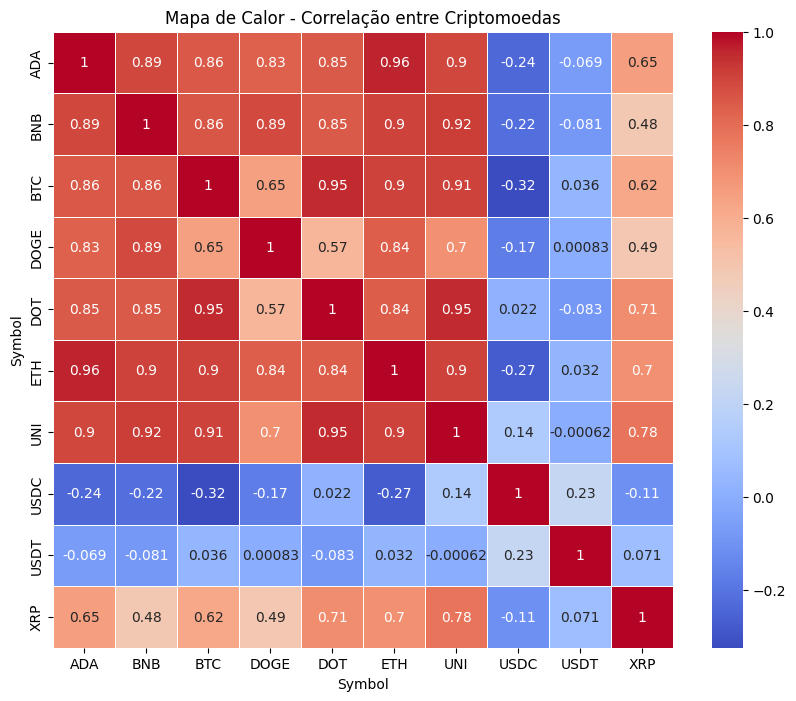

In [127]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor - Correlação entre Criptomoedas')
plt.show()


###Exportação